In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import vice
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from surp._globals import AGB_MODELS

using vice version  1.4.0.dev1


In [3]:
import surp

In [6]:
vice.imf.kroupa(12)

0.0001318084112850987

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.03, 13.2)

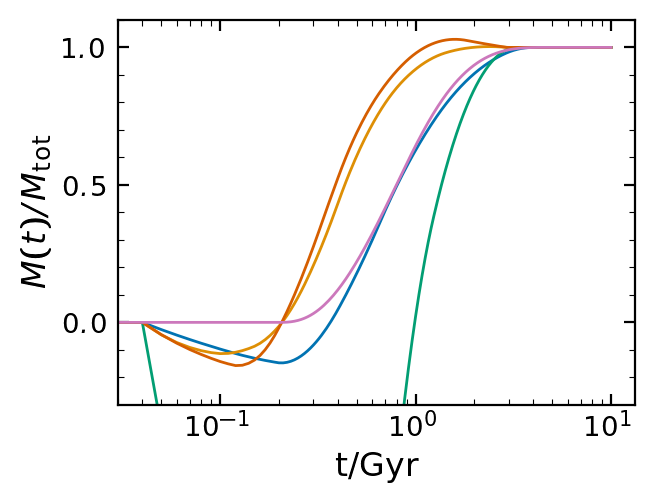

In [11]:

vice.yields.ccsne.settings["c"] = 0
vice.yields.sneia.settings["c"] = 0
vice.yields.ccsne.settings["fe"] = 0

for i in range(4):
    model = AGB_MODELS[i]
    vice.yields.agb.settings["c"] = model
    m_c, times = vice.single_stellar_population("c", Z=0.014 * 10**0)
    m_c = [c for c in m_c]
    plt.plot(times, np.array(m_c)/m_c[-1])

times = 10**np.linspace(-1.3, 1, 100)
ys = (np.tanh(3*np.log10(times/0.7)) + 1)/2


vice.yields.agb.settings["c"] = surp.yields.a_agb(m0=1.3)

m_c, times = vice.single_stellar_population("c", Z=0.014 * 10**0)
m_c = [c for c in m_c]
plt.plot(times, np.array(m_c)/m_c[-1])

plt.xlabel("t/Gyr")
plt.ylabel(r"$M(t)/M_{\rm tot}$")
plt.xscale("log")
plt.legend()
plt.ylim(-0.3, 1.1)
plt.xlim(0.03, 13.2)

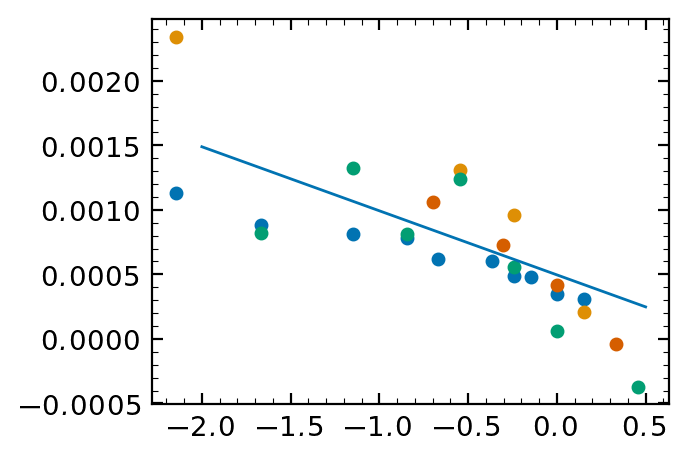

In [15]:
for i in range(len(AGB_MODELS)):
    model = AGB_MODELS[i]

    vice.yields.agb.settings["c"] = model
    vice.yields.ccsne.settings["c"] = 0
    Zs = 0.014*10**np.linspace(-2, 1, 100)
    
    # plots importaint points
    if type(model) == str:
        y1, m1, z1 = vice.yields.agb.grid('c', study=model)
        Zs = np.array(z1)
    mass_yields = []
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
        
    y_c_agb = np.array(mass_yields)/1e6 
    plt.scatter(np.log10(Zs/0.014), y_c_agb)

   
# pass
""
vice.yields.agb.settings["c"] = surp.yields.a_agb()

Zs = 0.014*10**np.linspace(-2, 0.5, 100)
mass_yields = []
for Z in Zs:
    m_c, times = vice.single_stellar_population("c", Z=Z)
    mass_yields.append(m_c[-1])

y_c_agb = np.array(mass_yields)/1e6 

plt.plot(np.log10(Zs/0.014), y_c_agb)